# Basic Tutorial Usage for eo-tilematcher

The aim of eo-tilematcher is to just show the tiles (Path-Row on Landsat speech) hitted by a certain geometry. Just That.

In [1]:
import pygeos
import sys
sys.path.append("../")
from eo_tilematcher.eo_tilematcher import intersects
import geopandas as gpd
from matplotlib import pyplot as plt

In [2]:
# helpers
def plot_tiles(gdf_tiles, figsize_=(12, 12), ax=None):
    if ax is None:
        f, ax = plt.subplots(1, 1, figsize=figsize_)
        gdf_tiles.plot(ax=ax, facecolor="none", edgecolor="k", lw=3)
    else:
        gdf_tiles.plot(
            ax=ax, facecolor="none", edgecolor="k", lw=3, figsize=figsize_
        )
    for index, r in gdf_tiles.iterrows():
        geom_x, geom_y = r["geometry"].centroid.x, r["geometry"].centroid.y
        name = "Tile Name {}".format(r.Name)
        ax.text(geom_x, geom_y, name)

    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    return ax

,Name,geometry
0,19JHM,"POLYGON Z ((-66.02117 -25.28609 0.00000, -64.9..."
1,19JHN,"POLYGON Z ((-66.04268 -24.38454 0.00000, -64.9..."
2,20JKS,"POLYGON Z ((-65.97923 -25.28609 0.00000, -64.8..."
3,20JKT,"POLYGON Z ((-65.95771 -24.38454 0.00000, -64.8..."
4,20JLS,"POLYGON Z ((-64.98661 -25.30281 0.00000, -63.8..."
5,20JLT,"POLYGON Z ((-64.97225 -24.40058 0.00000, -63.8..."


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

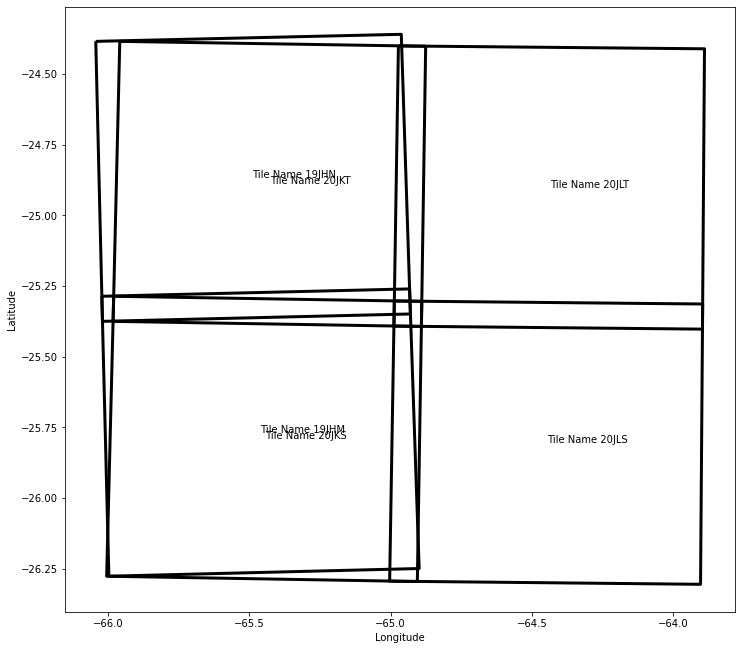

In [3]:
tile, geoms = intersects("sentinel2", pygeos.creation.box(-64, -26, -65, -25))
sentinel = gpd.GeoDataFrame(dict(Name=tile, geometry=geoms))
# just display
display(sentinel)
plot_tiles(sentinel)

,Name,geometry
0,"PATH:196,ROW:105","POLYGON Z ((-64.61132 -25.93672 0.00000, -64.7..."
1,"PATH:194,ROW:105","POLYGON Z ((-64.61131 -22.84657 0.00000, -64.7..."
2,"PATH:194,ROW:106","POLYGON Z ((-66.50211 -25.08176 0.00000, -66.4..."
3,"PATH:195,ROW:105","POLYGON Z ((-64.61131 -24.39167 0.00000, -64.7..."
4,"PATH:195,ROW:106","POLYGON Z ((-66.50212 -26.62681 0.00000, -66.4..."
5,"PATH:193,ROW:105","POLYGON Z ((-64.61132 -21.30152 0.00000, -64.7..."
6,"PATH:193,ROW:106","POLYGON Z ((-66.50211 -23.53666 0.00000, -66.4..."


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

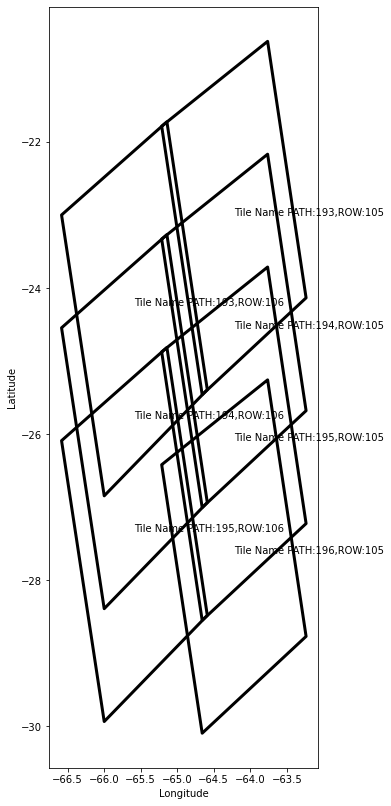

In [4]:
tile, geoms = intersects("landsat5", pygeos.creation.box(-64, -26, -65, -25))
landsat5 = gpd.GeoDataFrame(dict(Name=tile, geometry=geoms))
display(landsat5)
plot_tiles(landsat5,figsize_=(14,14))